# **Reinforcement Learning with Q-Learning**

![RL problem](rl.png)

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

## **Environment model**

In [2]:
nrows = 3
ncols = 4
nactions = 4

goal = set([(0,0), (1,3)])
actions = {0: (0,1), 1: (0,-1), 2: (-1,0), 3: (1,0)} # 0: right, 1: left, 2: up, 3: down

q_table = np.zeros([nrows, ncols, nactions], dtype=np.float32)

def get_random_state():
    return (random.randrange(nrows), random.randrange(ncols))

def get_random_action():
    return random.randrange(nactions)

def get_best_action(row, col):
    return np.argmax(q_table[row,col])

def apply_action(row, col, action):
    if (row,col) in goal:
        return row, col, 0, True

    new_row = row + actions[action][0]
    new_col = col + actions[action][1]
    if new_row < 0 or new_row >= nrows or new_col < 0 or new_col >= ncols:
        new_row, new_col = row, col

    return new_row, new_col, -1, False

In [3]:
q_table

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]], dtype=float32)

Initial policy:


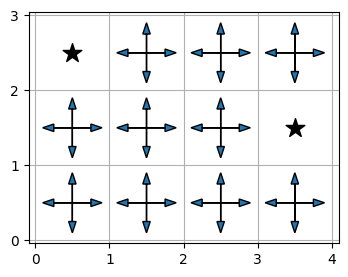

In [4]:
print('Initial policy:')
scale = 0.25
fig, ax = plt.subplots(figsize=(ncols, nrows))
for r in range(nrows):
    for c in range(ncols):
        if (r,c) in goal:
            plt.scatter(c+0.5, nrows-r-0.5, s=200, c='k', marker='*')
            continue
        amax = np.amax(q_table[r][c])
        for a in range(nactions):
            if q_table[r,c,a] == amax:
                plt.arrow(c+0.5, nrows-r-0.5, scale*actions[a][1], -scale*actions[a][0], head_width=0.1)

plt.xticks(np.arange(ncols+1))
plt.yticks(np.arange(nrows+1))
plt.grid(visible=True, which='major', axis='both')
plt.show()

## **Q-Learning**

In [5]:
# Hyperparameters
alpha = 0.1    # learning rate
gamma = 0.6    # discount rate
epsilon = 0.1  # exploration vs. exploitation

for i in range(100000):
    print('Episode {}'.format(i+1), end='\r')
    row,col = get_random_state()

    done = False
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = get_random_action() # Explore action space
        else:
            action = get_best_action(row,col) # Exploit learned values

        new_row, new_col, reward, done = apply_action(row, col, action) 

        old_value = q_table[row, col, action]
        new_action = get_best_action(new_row, new_col)
        next_max = q_table[new_row, new_col, new_action]
        
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[row, col, action] = new_value

        row, col = new_row, new_col

print("Training finished.\n")


Training finished.



## **Optimal policy**

In [6]:
q_table

array([[[ 0.        ,  0.        ,  0.        ,  0.        ],
        [-1.9599991 , -0.99999976, -1.5999993 , -1.9599991 ],
        [-1.5999993 , -1.5999993 , -1.9599991 , -1.5999993 ],
        [-1.5999993 , -1.9599991 , -1.5999993 , -0.99999976]],

       [[-1.9599991 , -1.5999993 , -0.99999976, -1.9599991 ],
        [-1.5999993 , -1.5999993 , -1.5999993 , -2.1759984 ],
        [-0.99999976, -1.9599991 , -1.9599991 , -1.9599991 ],
        [ 0.        ,  0.        ,  0.        ,  0.        ]],

       [[-2.1759984 , -1.9599991 , -1.5999993 , -1.9599991 ],
        [-1.9599991 , -1.9599991 , -1.9599991 , -2.1759984 ],
        [-1.5999993 , -2.1759984 , -1.5999993 , -1.9599991 ],
        [-1.5999993 , -1.9599991 , -0.99999976, -1.5999993 ]]],
      dtype=float32)

Optimal policy:


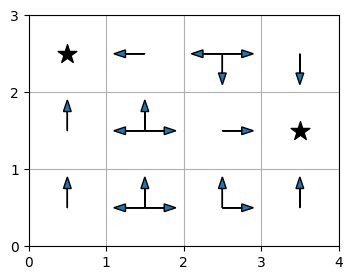

In [7]:
print('Optimal policy:')
scale = 0.25
fig, ax = plt.subplots(figsize=(ncols, nrows))
for r in range(nrows):
    for c in range(ncols):
        if (r,c) in goal:
            plt.scatter(c+0.5, nrows-r-0.5, s=200, c='k', marker='*')
            continue
        amax = np.amax(q_table[r][c])
        for a in range(nactions):
            if q_table[r,c,a] == amax:
                plt.arrow(c+0.5, nrows-r-0.5, scale*actions[a][1], -scale*actions[a][0], head_width=0.1)

plt.xticks(np.arange(ncols+1))
plt.yticks(np.arange(nrows+1))
plt.grid(visible=True, which='major', axis='both')
plt.show()